# Sentiment Analysis
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-4120/main/data/IMDB_movie_reviews_5k.csv

## Requirements
* Load data into dataframe
* Perform appropriate text cleaning and text preprocessing
* Choose a classification learning algorithm to use for model training
* Prepare data for model training
* Train model
* Display model accuaracy

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 02/17/24 15:32:09


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load data
* Independent variable: review
* Dependent variable: sentiment

In [4]:
# Load data file 'https://raw.githubusercontent.com/vjavaly/Baruch-CIS-4120/main/data/IMDB_movie_reviews_5k.csv' into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-4120/main/data/IMDB_movie_reviews_5k.csv')

### Examine data

In [5]:
pd.set_option('max_colwidth', None)

In [6]:
# Display first few rows of dataframe
df.head()

review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

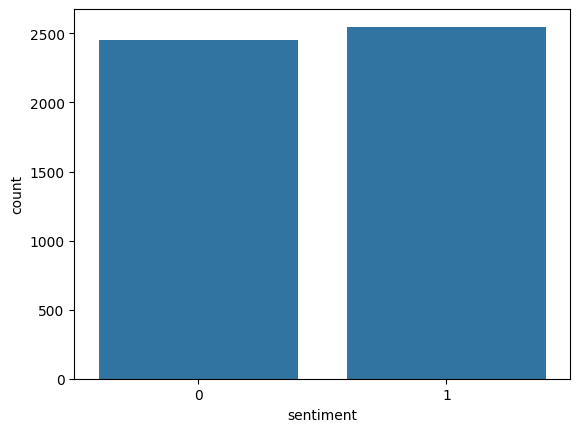

In [7]:
# Display bar graph showing class distribution ('sentiment' column)
sns.countplot(x='sentiment', data=df)
plt.show()

### Clean data

In [8]:
%%time

# Remove the string '<br /><br />' from 'review' column
df['review'] = df['review'].str.replace('<br /><br />', ' ')

# Remove extra spaces from 'review' column
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True).str.strip()

CPU times: user 709 ms, sys: 16.8 ms, total: 726 ms
Wall time: 997 ms


In [9]:
# Display first few rows of updated dataframe
df.head(2)

,review,sentiment
0,"Inept, boring, and incoherent supernatural ""thriller"" in which college student Cassie (Melissa Sagemiller) is the constant victim of hallucinations and nightmares after a car accident claims the life of her boyfriend Sean (Casey Affleck). I can't begin to tell you how bad this is...nothing of any importance ever happens nor is there ever any sort of actual entertainment value. I did not like this cast in this particular film - they are all sadly unconvincing (then again, their roles are no good). To promote this as a horror film is a joke. Where are the scares? There's no sense or suspense - there are a few good songs but that's about it. How on Earth did this project get the green light? Writer-director Steve Carpenter has no discernible vision or talent that I can sense. Worst of all, the conclusion really makes the whole movie pointless. The alleged ""killer cut"" that I watched is 86 minutes of pure tedium. 1/10",0
1,"Jimmy Cagney races by your eyes constantly in this story of a stage-producer who is vigorously struggling against the upcoming ""talking"" movies. This story of love, deceit, women and dancing is presented in such a manner that as a viewer you are never treated to a dull moment. The direction of the mass scenes in the rehearsal rooms was enormously well done. The story never really got lost in this frantic pace. Some parts of the material presented here have become a little dated but that doesn't matter because when you look at this in a 1933 time-frame it is fabulous to watch this next to a lot of the other drags of movies that were released during that time. Jimmy Cagney is a sight for sore eyes in this film, never loosing his composure as the ever-working producer of previews made for the movie theaters as intros. In this way he tries to save his ass from going out of business, he was a broadway producer before he started this. Joan Blondell is fabulous as the neglected love-interest, Nan, she gives such a spirited performance that is so unusual for movies of that time, so cool to watch a woman who is portrayed as a strong woman for a change. The only problem I had with the film were the enormous productions at the end. These were magnificent in itself, beautifully choreographed and wonderfully produced, but they just didn't seem to fit in the story. The only link they have to the main story is that Cagney had to put on 3 previews in 3 days to get a contract and that's what he did. I had a hard time believing that this was what the girls had been rehearsing during the entire movie and that these sets could fit in a movie theater. In this way the ""Sitting On A Backyard Fence"" was much more appropriate to the story. The productions at the end seemed to drag this frantically paced story to a halt and that was not a good thing. I was tired after seeing the first Musical sequence and then I realized there were another two coming up. These sequences got a lot a chuckles from the audience as well. All in all a great film with a sour ending. 9/10",1


### Prepare data

#### Create function to lowercase, remove punctuation, tokenize, remove stopwords, and lemmatize

In [10]:
lem = WordNetLemmatizer()

In [11]:
def clean_text(text):
  punct = string.punctuation
  stop = stopwords.words('english')
  text = "".join([word.lower() for word in text if word not in punct])
  tokens = re.split('\W+', text)
  text = [lem.lemmatize(word) for word in tokens if word not in stop]
  text_2 = ' '.join(word for word in text)
  return text_2

In [12]:
# Apply function to clean 'review' column
%%time

df['review_clean'] = df['review'].apply(clean_text)

CPU times: user 14.5 s, sys: 349 ms, total: 14.8 s
Wall time: 22.6 s


In [13]:
# Display first few rows of updated dataframe
df.head(2)

,review,sentiment,review_clean
0,"Inept, boring, and incoherent supernatural ""thriller"" in which college student Cassie (Melissa Sagemiller) is the constant victim of hallucinations and nightmares after a car accident claims the life of her boyfriend Sean (Casey Affleck). I can't begin to tell you how bad this is...nothing of any importance ever happens nor is there ever any sort of actual entertainment value. I did not like this cast in this particular film - they are all sadly unconvincing (then again, their roles are no good). To promote this as a horror film is a joke. Where are the scares? There's no sense or suspense - there are a few good songs but that's about it. How on Earth did this project get the green light? Writer-director Steve Carpenter has no discernible vision or talent that I can sense. Worst of all, the conclusion really makes the whole movie pointless. The alleged ""killer cut"" that I watched is 86 minutes of pure tedium. 1/10",0,inept boring incoherent supernatural thriller college student cassie melissa sagemiller constant victim hallucination nightmare car accident claim life boyfriend sean casey affleck cant begin tell bad isnothing importance ever happens ever sort actual entertainment value like cast particular film sadly unconvincing role good promote horror film joke scare there sense suspense good song thats earth project get green light writerdirector steve carpenter discernible vision talent sense worst conclusion really make whole movie pointless alleged killer cut watched 86 minute pure tedium 110
1,"Jimmy Cagney races by your eyes constantly in this story of a stage-producer who is vigorously struggling against the upcoming ""talking"" movies. This story of love, deceit, women and dancing is presented in such a manner that as a viewer you are never treated to a dull moment. The direction of the mass scenes in the rehearsal rooms was enormously well done. The story never really got lost in this frantic pace. Some parts of the material presented here have become a little dated but that doesn't matter because when you look at this in a 1933 time-frame it is fabulous to watch this next to a lot of the other drags of movies that were released during that time. Jimmy Cagney is a sight for sore eyes in this film, never loosing his composure as the ever-working producer of previews made for the movie theaters as intros. In this way he tries to save his ass from going out of business, he was a broadway producer before he started this. Joan Blondell is fabulous as the neglected love-interest, Nan, she gives such a spirited performance that is so unusual for movies of that time, so cool to watch a woman who is portrayed as a strong woman for a change. The only problem I had with the film were the enormous productions at the end. These were magnificent in itself, beautifully choreographed and wonderfully produced, but they just didn't seem to fit in the story. The only link they have to the main story is that Cagney had to put on 3 previews in 3 days to get a contract and that's what he did. I had a hard time believing that this was what the girls had been rehearsing during the entire movie and that these sets could fit in a movie theater. In this way the ""Sitting On A Backyard Fence"" was much more appropriate to the story. The productions at the end seemed to drag this frantically paced story to a halt and that was not a good thing. I was tired after seeing the first Musical sequence and then I realized there were another two coming up. These sequences got a lot a chuckles from the audience as well. All in all a great film with a sour ending. 9/10",1,jimmy cagney race eye constantly story stageproducer vigorously struggling upcoming talking movie story love deceit woman dancing presented manner viewer never treated dull moment direction mass scene rehearsal room enormously well done story never really got lost frantic pace part material presented become little dated doesnt matter look 1933 timefra

### Separate independent and dependent variables


In [14]:
X = df.drop("sentiment", axis = 1)
y = df["sentiment"]

#### Vectorize independent variables using TF-IDF vectorizer

In [15]:
%%time

vectorizer = TfidfVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['review'])

CPU times: user 6.12 s, sys: 299 ms, total: 6.42 s
Wall time: 7.5 s


In [16]:
tfidf_matrix.shape

(5000, 10000)

In [17]:
tfidf_matrix

<5000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 415445 stored elements in Compressed Sparse Row format>

### Split data into training and test sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.25, random_state=42)

### Train a classification model

In [19]:
RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Calculate and display model performance accuracy

In [20]:
RF_predictions = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_predictions)
print("Random forest accuracy = ", round((RF_accuracy * 100), 5), "%")

Random forest accuracy =  83.76 %
